# America Sign Language Detection
### Dataset yang digunakan berasal dari :
### https://www.kaggle.com/datamunge/sign-language-mnist

#### Problem : Sekarang ini banyak sekali pelanggan dalam suatu perusahaan atau masyarakat dalam suatu pemerintahan yang diantaranya ada yang tunarungu(tuli) yang dimana mereka tidak bisa berbicara karena kebanyakan dari kecil sudah tidak pernah mendegar sehingga mereka hanya bisa berkomunikasi dengan menggunakan gestur tangan, sehingga ketika pusat pelayanan pelanggan suatu perusahaan atau institusi pemerintahan melayani pelanggan atau masyarakat yang tunarungu akan terjadi kendala komunikasi. Dimana berdasarkan data kemenkes 7,03% penyandang disabilitas adalah tunarungu.

#### Solution : Object Detection, dimana kita melakukan deteksi pola pada tangan tunarungu untuk mendapatkan kata-kata yang ingin dia ucapkan sehinnga kita mengerti maksud dari yang tunarungu inginkan.

#### Informasi Dari Dataset:
##### The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

<img src="american_sign_language.png">

### Import Library dan Framework yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

### Melakukan Loading dan Preprocessing dari Dataset

In [2]:
df_train = pd.read_csv("sign_mnist_train.csv")

In [3]:
df_test = pd.read_csv("sign_mnist_test.csv")

### Melakukan Analisis Data- Data yang terdapat pada dataframe

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [5]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [7]:
df_train.shape, df_test.shape

((27455, 785), (7172, 785))

#### Dari data tersebut bisa dilihat bahwa data memiliki 785 kolum yang dimana 1 kolum adalah label, 784 kolum adalah pixel gambar dari pixel1 - pixel 784 yang merepresentasikan 28x28 image dalam berbentuk grayscale dengan angka (0-255)
#### Data Training memiliki 27.445 data
#### Data Testing memiliki 7.172 data

### Melakukan Pembagian Data Menjadi x -> data pixel gambar y-> label gambar

In [8]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
x_test= df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

### Mencetak Gambar Gestur Tangan yang ada pada Dataset

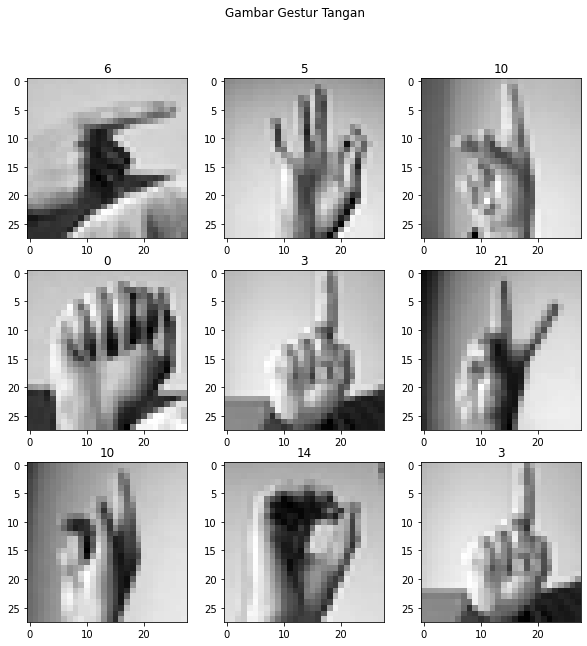

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.array(x_test.iloc[i]).reshape(28,28),cmap="gray")
    label = int(y_test[i])
    plt.title(label)
    plt.suptitle("Gambar Gestur Tangan")
plt.show()

### Mencari tau berapa jenis label yang ada di dataset, disini berdasarkan keterangan dari dataset yang diberikan ada 2 jenis abjad yang hilang yaitu 9 -> J dan 25 -> Z

In [10]:
unique = df_train.label.unique()
unique.sort()
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

### Merubah Label dari Interger menjadi Abjad untuk divisualisasikan

In [11]:
df_train.loc[(df_train.label == 0),'label']='A'
df_train.loc[(df_train.label == 1),'label']='B'
df_train.loc[(df_train.label == 2),'label']='C'
df_train.loc[(df_train.label == 3),'label']='D'
df_train.loc[(df_train.label == 4),'label']='E'
df_train.loc[(df_train.label == 5),'label']='F'
df_train.loc[(df_train.label == 6),'label']='G'
df_train.loc[(df_train.label == 7),'label']='H'
df_train.loc[(df_train.label == 8),'label']='I'
df_train.loc[(df_train.label == 10),'label']='K'
df_train.loc[(df_train.label == 11),'label']='L'
df_train.loc[(df_train.label == 12),'label']='M'
df_train.loc[(df_train.label == 13),'label']='N'
df_train.loc[(df_train.label == 14),'label']='O'
df_train.loc[(df_train.label == 15),'label']='P'
df_train.loc[(df_train.label == 16),'label']='Q'
df_train.loc[(df_train.label == 17),'label']='R'
df_train.loc[(df_train.label == 18),'label']='S'
df_train.loc[(df_train.label == 19),'label']='T'
df_train.loc[(df_train.label == 20),'label']='U'
df_train.loc[(df_train.label == 21),'label']='V'
df_train.loc[(df_train.label == 22),'label']='W'
df_train.loc[(df_train.label == 23),'label']='X'
df_train.loc[(df_train.label == 24),'label']='Y'

In [12]:
df_test.loc[(df_test.label == 0),'label']='A'
df_test.loc[(df_test.label == 1),'label']='B'
df_test.loc[(df_test.label == 2),'label']='C'
df_test.loc[(df_test.label == 3),'label']='D'
df_test.loc[(df_test.label == 4),'label']='E'
df_test.loc[(df_test.label == 5),'label']='F'
df_test.loc[(df_test.label == 6),'label']='G'
df_test.loc[(df_test.label == 7),'label']='H'
df_test.loc[(df_test.label == 8),'label']='I'
df_test.loc[(df_test.label == 10),'label']='K'
df_test.loc[(df_test.label == 11),'label']='L'
df_test.loc[(df_test.label == 12),'label']='M'
df_test.loc[(df_test.label == 13),'label']='N'
df_test.loc[(df_test.label == 14),'label']='O'
df_test.loc[(df_test.label == 15),'label']='P'
df_test.loc[(df_test.label == 16),'label']='Q'
df_test.loc[(df_test.label == 17),'label']='R'
df_test.loc[(df_test.label == 18),'label']='S'
df_test.loc[(df_test.label == 19),'label']='T'
df_test.loc[(df_test.label == 20),'label']='U'
df_test.loc[(df_test.label == 21),'label']='V'
df_test.loc[(df_test.label == 22),'label']='W'
df_test.loc[(df_test.label == 23),'label']='X'
df_test.loc[(df_test.label == 24),'label']='Y'

In [13]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,D,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,G,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,C,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,C,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,N,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,N,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,X,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,S,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,R,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [14]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,G,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,F,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,K,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,A,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,D,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,B,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,M,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,C,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,E,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63


### Disini kita melakukan pembagian data kembali karena tadi kita mengolah data df_train dan df_test kembali untuk mengubahnya menjadi Abjad

In [15]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
x_test= df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

### Melakukan Visualisasi Pixel Gambar pada Dataset dengan menggunakan Label Abjad

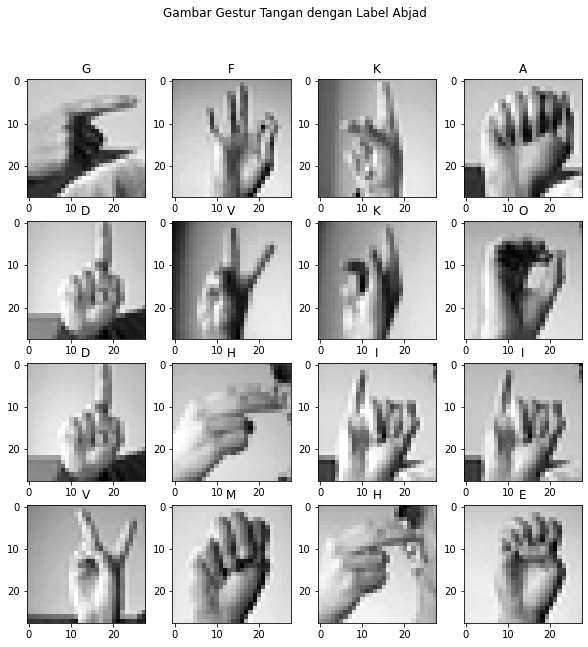

In [16]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(np.array(x_test.iloc[i]).reshape(28,28),cmap="gray")
    label = (y_test[i])
    plt.title(label)
    plt.suptitle("Gambar Gestur Tangan dengan Label Abjad")
plt.show()

### Mengecek Distribusi dalam data training dan testing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribusi dalam Training')

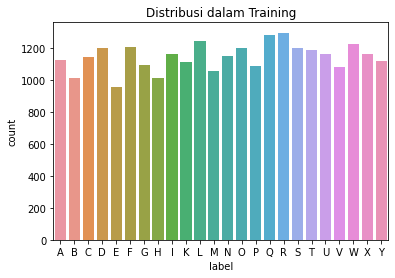

In [17]:
sns.countplot(y_train.sort_values())
plt.title ("Distribusi dalam Training")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribusi dalam Testing')

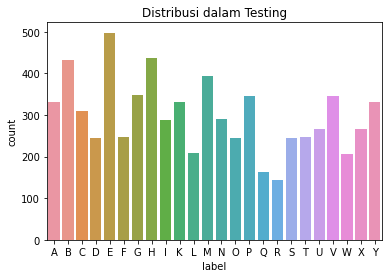

In [18]:
sns.countplot(y_test.sort_values())
plt.title ("Distribusi dalam Testing")

### Mengubah Dataframe Numpy Array dari 1-D menjadi 3-D karena untuk input layer CNN diperlukan array 3-D
### Melakukan Reshape Data Menjadi (-1,28,28,1)
#### -1 -> Menandakan Mengambil Semua Jumlah Row pada dataframe
#### 28,28 -> Melakukan reshape pixel menjadi 28 x 28 (lebar x tinggi)
#### 1 -> Merupakan nilai channel dari gambar tersebut

In [19]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

### Melakukan Image Data Generator
#### Image Data Generator berfungsi untuk melakukan transformasi gambar untuk dapat memberi filter ketika dilakukannya training dan validation agar model yang dilatih lebih siap dalam mengenali beberapa kondisi ketika dalam melakukan prediksi
##### Rescale : Melakukan Rescaling pada Numpy Array agar target menjadi hanya 0-1 dan tidak mencapai 0-255 yang akan membuat training menjadi tidak efisien.
##### Rotation_range : Melakukan Rotasi sebesar 30 derajat.
##### Width_Shift_range : Melakukan pembesaran lebar gambar mencapai 0.2
##### Width_Shift_range : Melakukan pembesaran tinggi gambar mencapai 0.2
##### Shear_range : Melakukan perubahan angle-angle pada gambar
##### zoom_range : Melakukan pembesaran dan perkecilan gambar mencapai 0.2
##### Melakukan flip secara horizontal 
##### Untuk informasi lebih lanjut bisa dicek di : https://keras.io/preprocessing/image/

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

### Melakukan Perubahan Data Label Menjadi Binary
#### Mengunakan Label Binarizer yang merupakan fungsi dari Scikit yang dimana menerima Data bersifat Kategori dan mereturn array numpy. Dimana disini fungsinya mengencode data menjadi sebuah dummy variabel untuk mengecek apakah labelnya ada atau tidak dan labelnya akan disimpan di dalam sebuah label array.

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
y_test = label_binrizer.fit_transform(y_test)
y_train, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]))

### Membuat Model CNN

#### Model ini terdiri dari 3 Convolutional layer yang disertai dengan Maxpolling layer untuk memberikan penyeleksian feature yang lebih baik.

##### Layer 1 Convolution - 32 Kernel - 3*3 - ReLU Activation - Padding Same
##### Layer 2 Convolution - 64 Kernel - 3*3 - ReLU Activation - Padding Same
##### Layer 3 Convolution - 128 Kernel - 3*3 - ReLU Activation - Padding Same

##### Layer 1 MaxPoll - 2x2 Window
##### Layer 2 MaxPoll - 2x2 Window
##### Layer 3 MaxPoll - 2x2 Window

##### Dense layer mencapai 512 units/neuron, Activation ReLU
##### Output layer terdiri dari 24 units/neuron karena output terdiri dari 24 jenis kategori class, Activation = Softmax

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.softmax)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

### Melakukan Compile Model dan Melakukan Training dan Validasi

In [23]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                              epochs=35,
                              verbose=1,
                              validation_data=validation_datagen.flow(x_test, y_test))

Epoch 1/35
858/858 [==============================] - 14s 13ms/step - loss: 2.8159 - accuracy: 0.1401 - val_loss: 1.2312 - val_accuracy: 0.6000
Epoch 2/35
858/858 [==============================] - 10s 12ms/step - loss: 1.4142 - accuracy: 0.5269 - val_loss: 0.5634 - val_accuracy: 0.8109
Epoch 3/35
858/858 [==============================] - 10s 12ms/step - loss: 0.8670 - accuracy: 0.7088 - val_loss: 0.3403 - val_accuracy: 0.8680
Epoch 4/35
858/858 [==============================] - 11s 12ms/step - loss: 0.5883 - accuracy: 0.8002 - val_loss: 0.2789 - val_accuracy: 0.9031
Epoch 5/35
858/858 [==============================] - 11s 12ms/step - loss: 0.4419 - accuracy: 0.8484 - val_loss: 0.1457 - val_accuracy: 0.9562
Epoch 6/35
858/858 [==============================] - 10s 12ms/step - loss: 0.3488 - accuracy: 0.8842 - val_loss: 0.1309 - val_accuracy: 0.9555
Epoch 7/35
858/858 [==============================] - 11s 12ms/step - loss: 0.3024 - accuracy: 0.8981 - val_loss: 0.0781 - val_accuracy:

In [24]:
loss,acc = model.evaluate_generator(validation_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy: 99.31678771972656
Loss: 0.017892494797706604


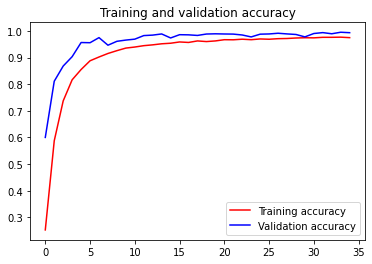

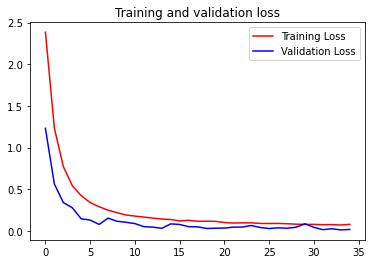

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
y_pred=model.predict_classes(x_test/255)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
y_te = np.argmax(y_test,axis=1)
y_te

array([6, 5, 9, ..., 2, 4, 2])

### Hasil Akurasi Prediksi dari Model yang dibuat

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,y_pred)

0.9931678750697156

### Confusion Matrix

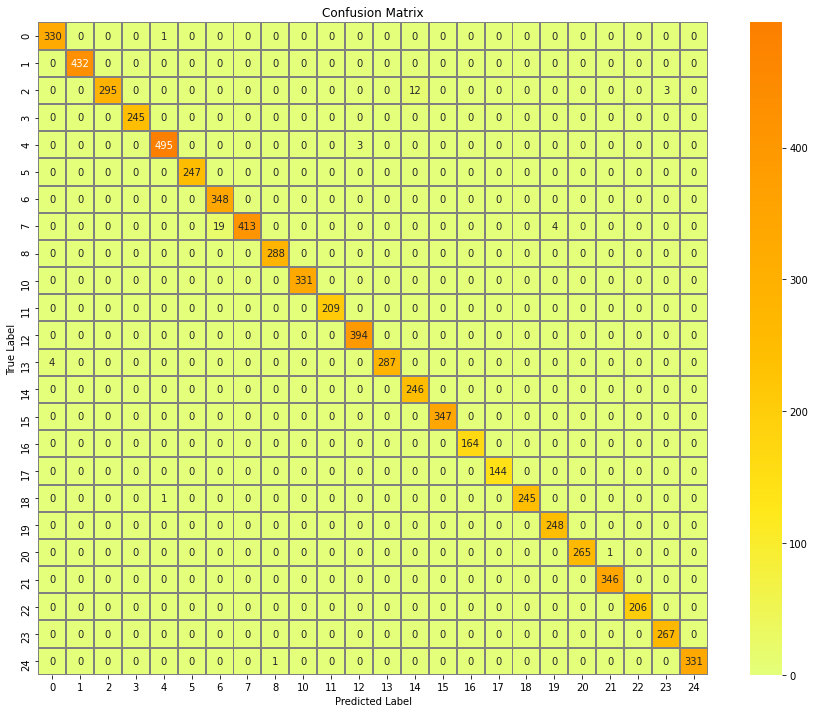

In [29]:
confusion_mtx = confusion_matrix(y_te, y_pred) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=1,cmap="Wistia",linecolor="gray", fmt= '',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Classification Report dari Training Model yang kita lakukan

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       1.00      1.00      1.00       432
           2       1.00      0.95      0.98       310
           3       1.00      1.00      1.00       245
           4       1.00      0.99      0.99       498
           5       1.00      1.00      1.00       247
           6       0.95      1.00      0.97       348
           7       1.00      0.95      0.97       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       0.99      1.00      1.00       394
          12       1.00      0.99      0.99       291
          13       0.95      1.00      0.98       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       1.00      1.00      1.00       144
          17       1.00    

In [31]:
y_te = label_binrizer.inverse_transform(y_test)

### Melakukan Prediksi

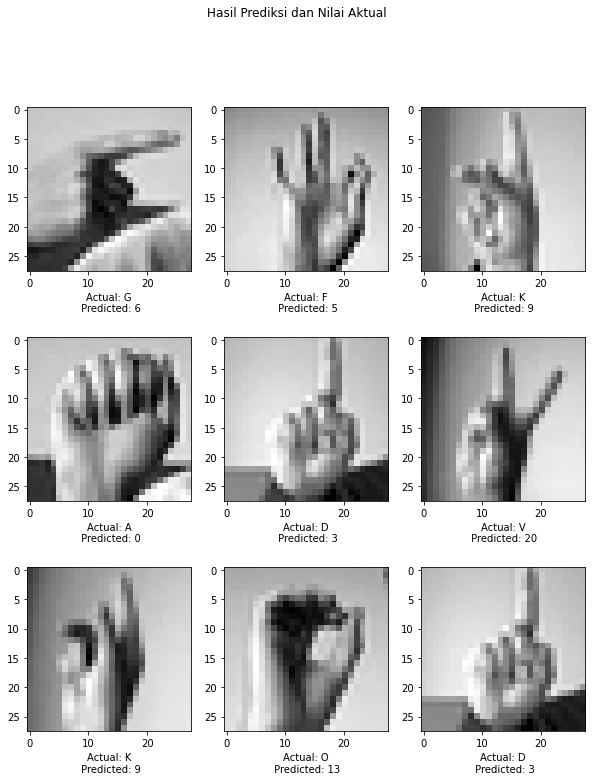

In [32]:
plt.figure(figsize=(10, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap="gray")
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
    plt.suptitle("Hasil Prediksi dan Nilai Aktual")

plt.show()

### Melakukan Penyimpanan Model untuk agar dapat diload ke OpenCV dan Python untuk dilakukan pendeteksian secara realtime menggunakan MobileNet

In [33]:
model.save("sign.h5")